New Notebook Created by Jupyter MCP Server

In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Polygon, Ellipse
from matplotlib.collections import PatchCollection
from ipywidgets import Play, IntSlider, jslink, HBox, VBox, Output
from IPython.display import display

plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["axes.axisbelow"] = True
plt.rcParams["axes.facecolor"] = "#f7f7f7"

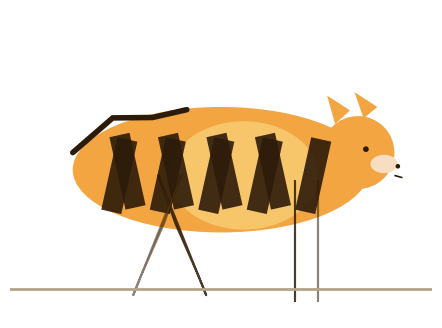

In [2]:
def leg_polygon(base_x, base_y, phase, offset=0.0, length_scale=1.0):
    stride = math.sin(2 * math.pi * (phase + offset))
    swing = stride * 0.6 * length_scale
    knee = (base_x + swing * 0.25, base_y - 0.35 - abs(swing) * 0.12)
    ankle = (base_x + swing * 0.6, base_y - 0.9)
    toe = (base_x + swing * 0.7, base_y - 1.05)
    return [(base_x, base_y), knee, ankle, toe]


def tiger_patches(phase):
    patches = []
    y_bob = 0.08 * math.sin(2 * math.pi * phase)

    # Body and head
    body = Ellipse((0.35, 0 + y_bob), 2.6, 1.1, fc="#f2a541", ec="none")
    chest = Ellipse((0.55, -0.05 + y_bob), 1.3, 0.95, fc="#f7c56a", ec="none")
    head = Circle((1.55, 0.15 + y_bob), 0.32, fc="#f2a541", ec="none")
    snout = Ellipse((1.78, 0.05 + y_bob), 0.24, 0.16, fc="#f8dec0", ec="none")
    ear1 = Polygon([(1.35, 0.4 + y_bob), (1.28, 0.65 + y_bob), (1.48, 0.52 + y_bob)], fc="#f2a541", ec="none")
    ear2 = Polygon([(1.6, 0.45 + y_bob), (1.52, 0.68 + y_bob), (1.72, 0.55 + y_bob)], fc="#f2a541", ec="none")
    patches += [body, chest, head, snout, ear1, ear2]

    # Stripes on body
    stripe_x = np.linspace(-0.7, 1.0, 9)
    for i, sx in enumerate(stripe_x):
        tilt = (i % 2 - 0.5) * 25
        stripe = Rectangle((sx, -0.35 + y_bob), 0.18, 0.65, angle=tilt, fc="#2d1b0a", ec="none", alpha=0.9)
        patches.append(stripe)

    # Tail
    tail_base = (-0.95, 0.15 + y_bob)
    tail_swing = 0.4 * math.sin(2 * math.pi * phase + math.pi / 3)
    tail_points = [
        tail_base,
        (-0.6, 0.35 + y_bob + tail_swing * 0.3),
        (-0.25, 0.25 + y_bob + tail_swing * 0.6),
        (0.05, 0.18 + y_bob + tail_swing),
    ]
    tail = Polygon(tail_points, closed=False, fill=False, ec="#2d1b0a", lw=4, capstyle="round")

    # Legs
    leg_defs = [
        (1.0, -0.1, 0.0, 1.0, 0.85),   # front right
        (1.2, -0.1, 0.5, 1.0, 0.55),   # front left (farther, lighter alpha)
        (-0.2, -0.05, 0.25, 1.0, 0.85), # hind right
        (0.0, -0.05, 0.75, 1.0, 0.55), # hind left (farther)
    ]
    for lx, ly, off, scale, alpha in leg_defs:
        points = leg_polygon(lx, ly + y_bob, phase, offset=off, length_scale=scale)
        leg = Polygon(points, closed=True, fc="#c4731f", ec="#2d1b0a", lw=1.5, alpha=alpha)
        patches.append(leg)

    # Eye and nose
    eye = Circle((1.62, 0.18 + y_bob), 0.025, fc="#2d1b0a", ec="none")
    nose = Circle((1.9, 0.03 + y_bob), 0.02, fc="#2d1b0a", ec="none")
    mouth = Polygon([(1.87, -0.05 + y_bob), (1.94, -0.07 + y_bob)], closed=False, fill=False, ec="#2d1b0a", lw=1.2)
    patches += [eye, nose, mouth]

    return patches, tail


def draw_tiger(ax, phase):
    ax.clear()
    patches, tail = tiger_patches(phase)
    pc = PatchCollection(patches, match_original=True)
    ax.add_collection(pc)
    ax.add_patch(tail)

    ax.axhline(-1.05, color="#b3a389", lw=2)
    ax.set_xlim(-1.5, 2.2)
    ax.set_ylim(-1.3, 1.4)
    ax.set_aspect("equal")
    ax.axis("off")


# quick preview
fig, ax = plt.subplots()
draw_tiger(ax, phase=0.0)
plt.show()
plt.close(fig)

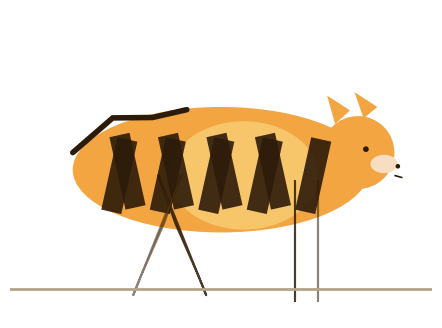

In [3]:
frames = 60
play = Play(value=0, min=0, max=frames - 1, step=1, interval=40)
slider = IntSlider(value=0, min=0, max=frames - 1, description="frame", readout=False, continuous_update=True)
jslink((play, "value"), (slider, "value"))

out = Output()
fig, ax = plt.subplots()


def render(frame: int):
    phase = frame / frames
    draw_tiger(ax, phase)
    fig.canvas.draw_idle()
    out.clear_output(wait=True)
    with out:
        display(fig)


def on_frame(change):
    render(change["new"])


slider.observe(on_frame, names="value")
play.observe(on_frame, names="value")

render(0)
display(VBox([out, HBox([play, slider])]))